In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/question4-stock-data.csv')
df.head()

Unnamed: 0        Date  Adj Close     Close      High       Low      Open  \
0           0  1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000   
1           1  1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000   
2           2  1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606   
3           3  1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000   
4           4  1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000   

    Volume  
0  41109.0  
1   9343.0  
2      0.0  
3  10277.0  
4   8409.0

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.shape

(11291, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11181 non-null  datetime64[ns]
 1   Adj Close  11198 non-null  float64       
 2   Close      11174 non-null  float64       
 3   High       11196 non-null  float64       
 4   Low        11164 non-null  float64       
 5   Open       11188 non-null  float64       
 6   Volume     11146 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 617.6 KB


In [23]:
df.describe().T

count                           mean                  min  \
Date         11181  2002-08-03 13:57:54.429836288  1980-03-17 00:00:00   
Adj Close  11198.0                       63.60913             2.259452   
Close      11174.0                      72.026945             3.237711   
High       11196.0                        72.5031             3.237711   
Low        11164.0                      71.665079             3.237711   
Open       11188.0                      67.999259                  0.0   
Volume     11146.0                  214415.698816                  0.0   

                           25%                  50%                  75%  \
Date       1991-05-17 00:00:00  2002-07-26 00:00:00  2013-10-21 00:00:00   
Adj Close            19.224636              50.6089           104.723621   
Close                     27.5               66.035           114.297503   
High                 27.789255            66.724998             114.8925   
Low                  27.536156            65.418751           113.639999   
Open                       0.0            66.065002           114.269997   
Volume                 13500.0              90323.5             291575.0   

                           max            std  
Date       2024-12-27 00:00:00            NaN  
Adj Close           254.770004      52.266247  
Close               254.770004      51.259828  
High                255.229996      51.550735  
Low                 253.589996      51.011632  
Open                     255.0      55.834401  
Volume              18582700.0  388366.236049

In [ ]:
df.isnull().sum()

Date         110
Adj Close     93
Close        117
High          95
Low          127
Open         103
Volume       145
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

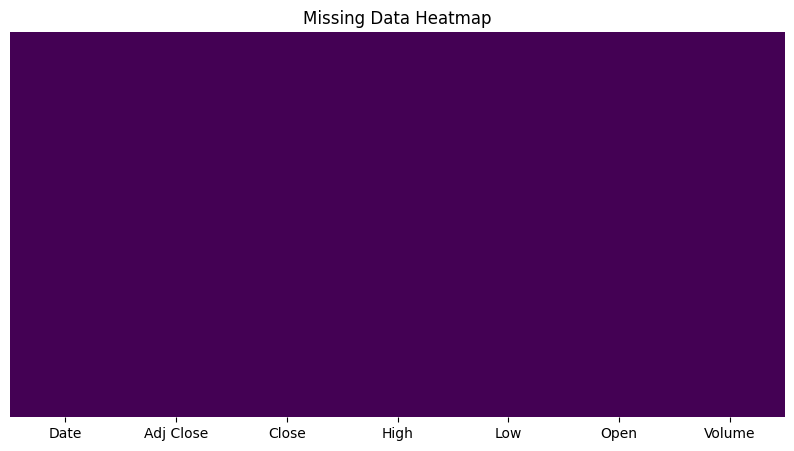

In [ ]:
# Visualizing Missing Data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Date         0.0
Adj Close    0.0
Close        0.0
High         0.0
Low          0.0
Open         0.0
Volume       0.0
dtype: float64

In [14]:
#df.dropna(inplace=True)

In [5]:
# Interpolate missing values
df['Date'] = df['Date'].interpolate(method='linear', limit_direction='both')

In [6]:
df.interpolate(method='linear', inplace=True)

In [ ]:
!pip install sweetviz
import sweetviz as sv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 65.2 MB/s eta 0:00:00


In [ ]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### OHLC Line plot

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=4, cols=1,subplot_titles=('Open','High','Low','Close'))

fig.add_trace(
    Line(x=df.index, y=df.Open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.High),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.Low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.index, y=df.Close),
    row=4, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Stock Price with Moving Averages

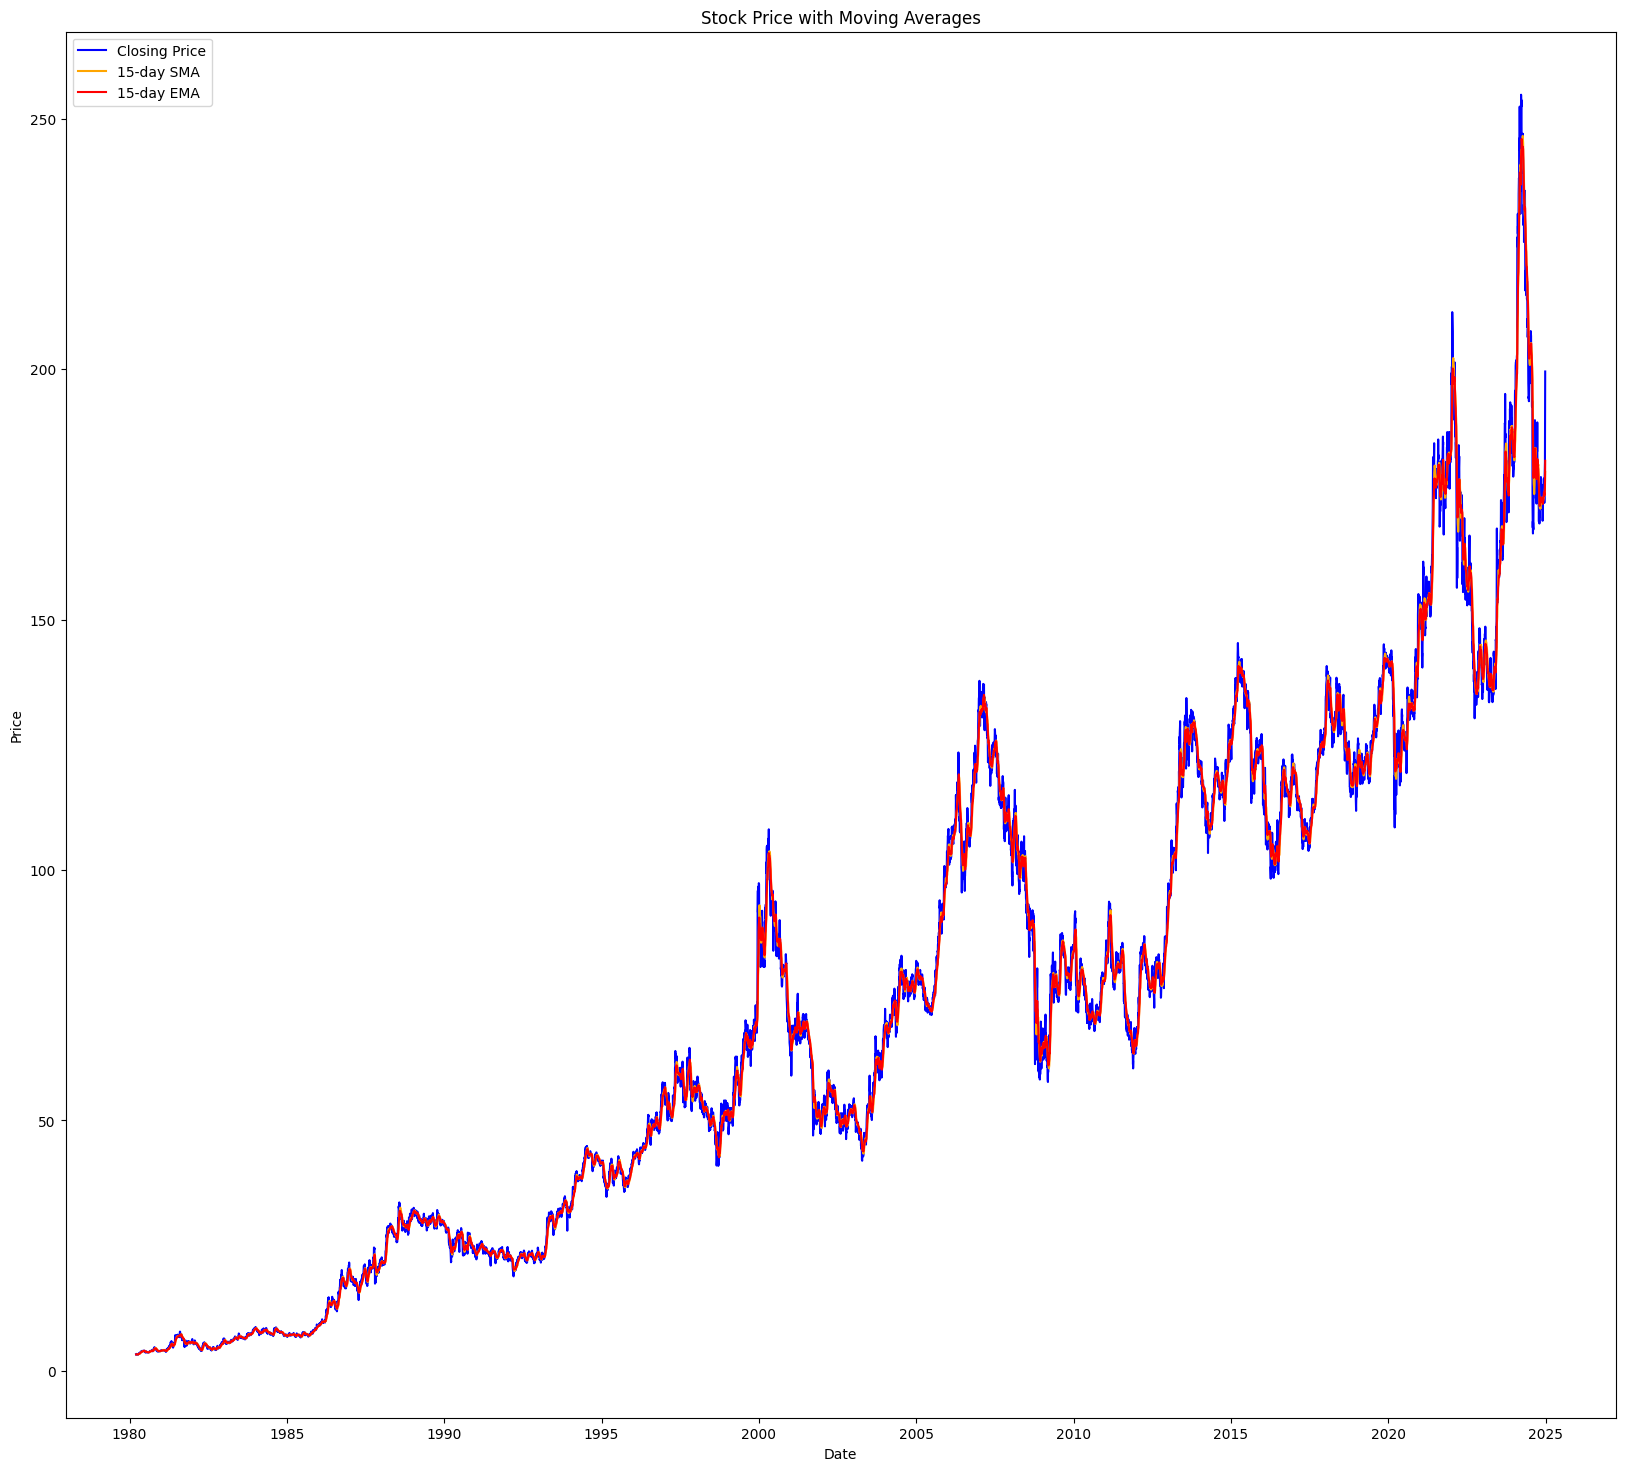

In [9]:
df['SMA_15'] = df['Close'].rolling(window=15).mean()  # 15-day simple moving average
df['EMA_15'] = df['Close'].ewm(span=15, adjust=False).mean()  # 15-day exponential moving average

plt.figure(figsize=(20, 18))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='blue')
plt.plot(df['Date'], df['SMA_15'], label="15-day SMA", color='orange')
plt.plot(df['Date'], df['EMA_15'], label="15-day EMA", color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

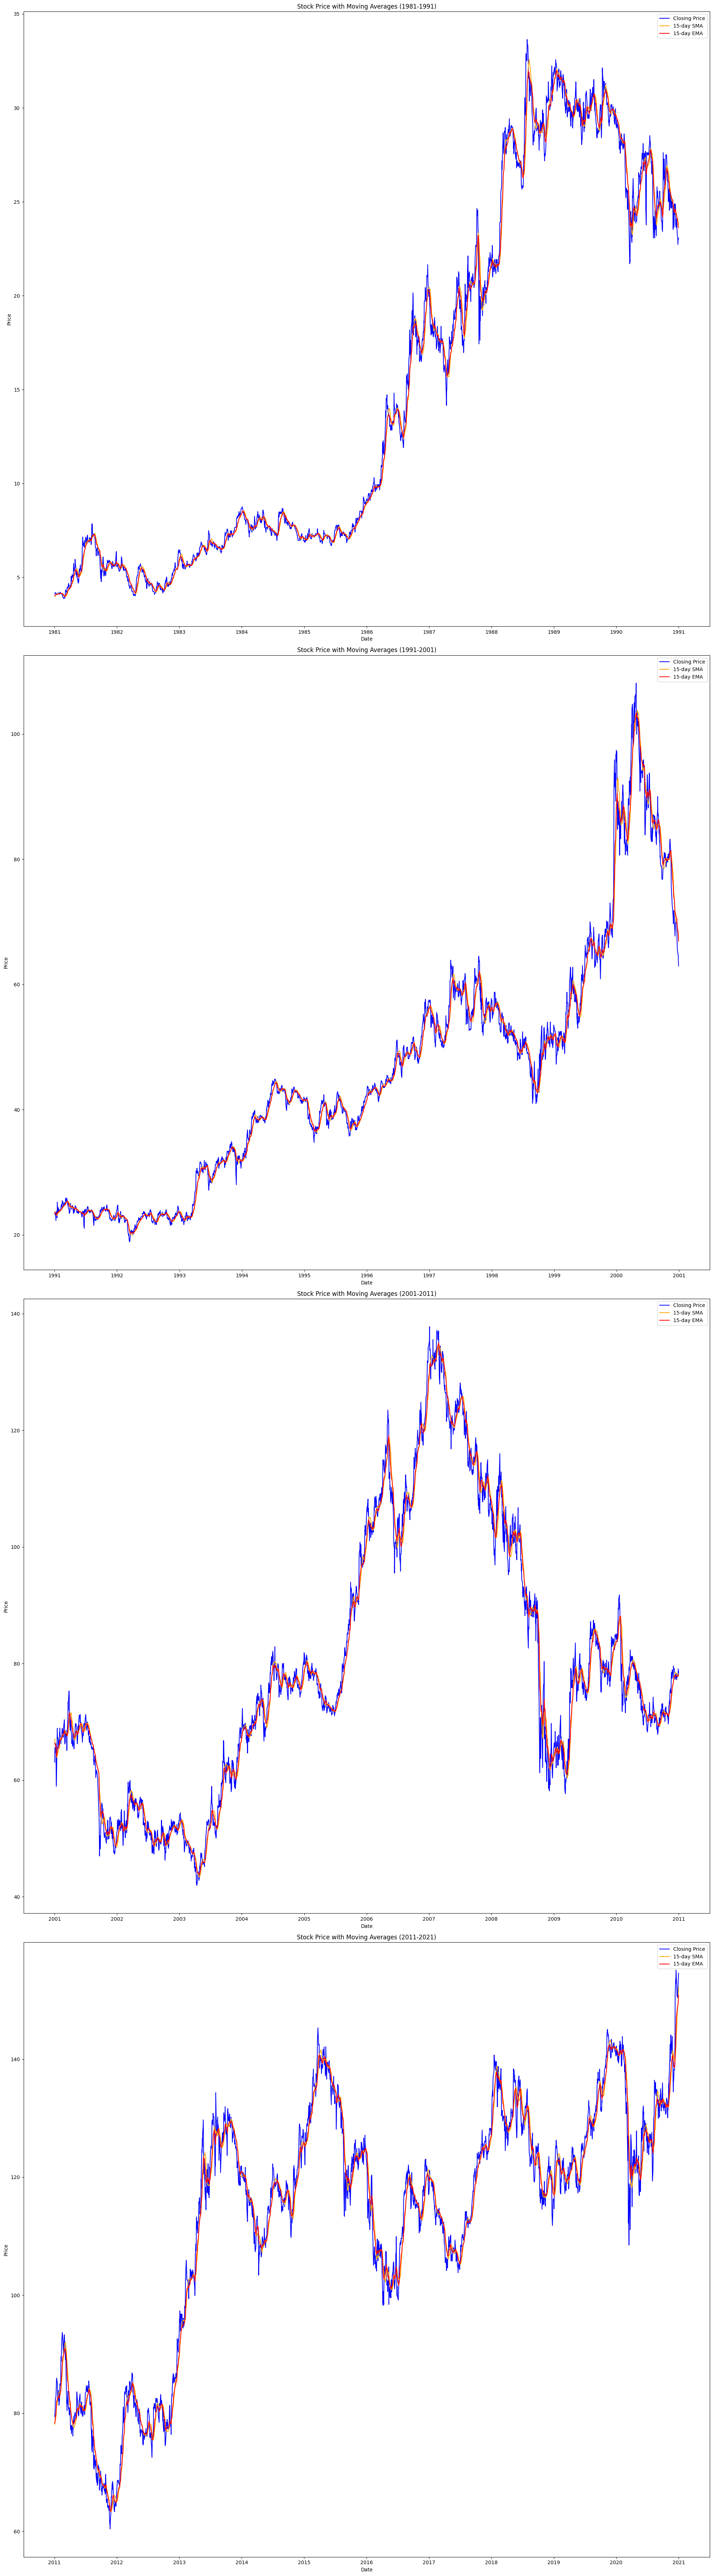

In [10]:
min_date = df['Date'].min()
max_date = df['Date'].max()
intervals = pd.date_range(start=min_date, end=max_date, freq='10YS')

fig, axes = plt.subplots(len(intervals) - 1, 1, figsize=(20, 18 * (len(intervals) - 1)), sharex=False)

for i in range(len(intervals) - 1):
  start_date = intervals[i]
  end_date = intervals[i+1]

  df_interval = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]

  axes[i].plot(df_interval['Date'], df_interval['Close'], label="Closing Price", color='blue')
  axes[i].plot(df_interval['Date'], df_interval['SMA_15'], label="15-day SMA", color='orange')
  axes[i].plot(df_interval['Date'], df_interval['EMA_15'], label="15-day EMA", color='red')

  axes[i].set_xlabel("Date")
  axes[i].set_ylabel("Price")
  axes[i].set_title(f"Stock Price with Moving Averages ({start_date.year}-{end_date.year})")
  axes[i].legend()

plt.tight_layout()
plt.show()

### Distribution of Daily Returns

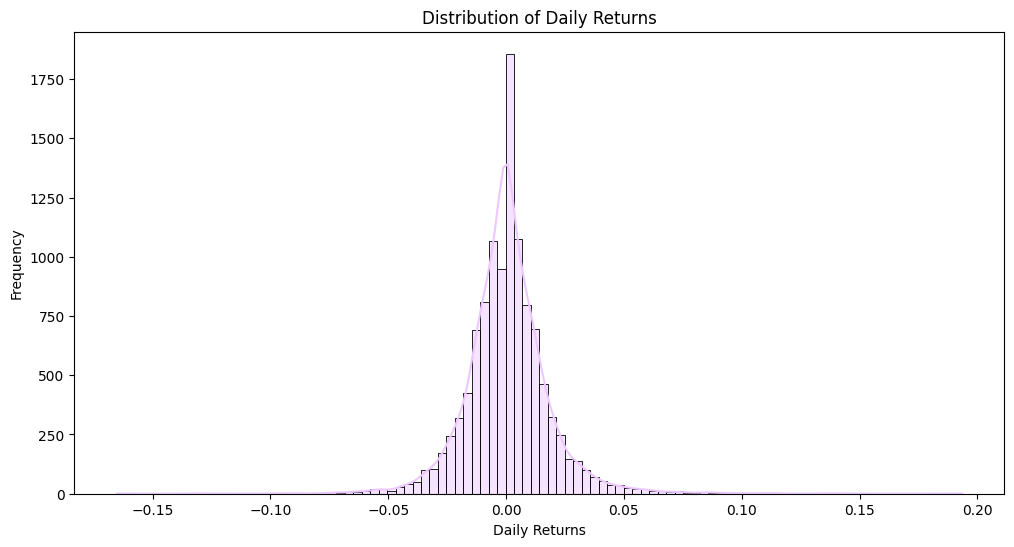

In [48]:
df['Daily_Returns'] = df['Close'].pct_change()

plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Returns'], kde=True, bins=100, color="#EDC8FF")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()

### Stock Price Rolling Volatility (15 Days)

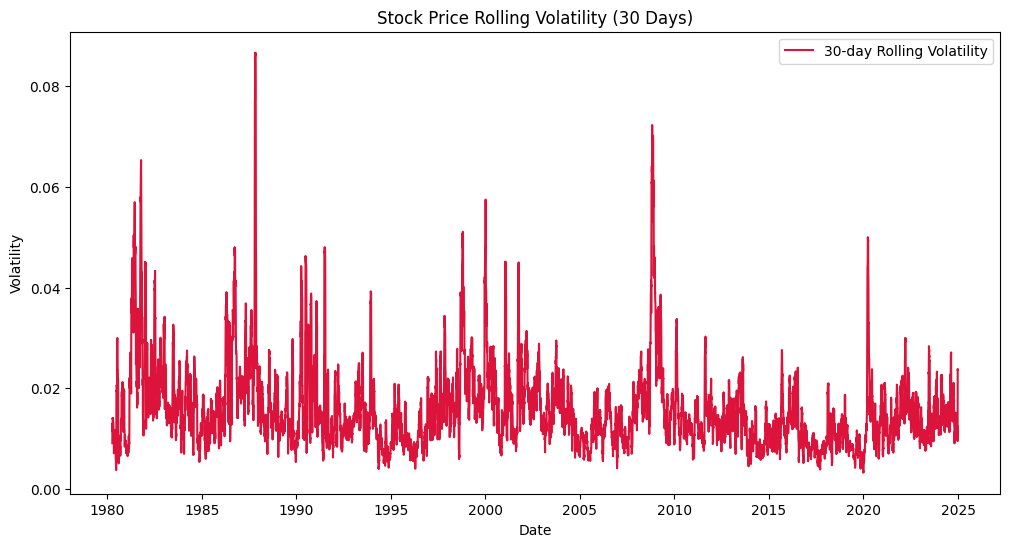

In [12]:
df['Volatility_15'] = df['Daily_Returns'].rolling(window=15).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility_15'], color='crimson', label="15-day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Stock Price Rolling Volatility (15 Days)")
plt.legend()
plt.show()

### seasonal decomposition early years and recent years

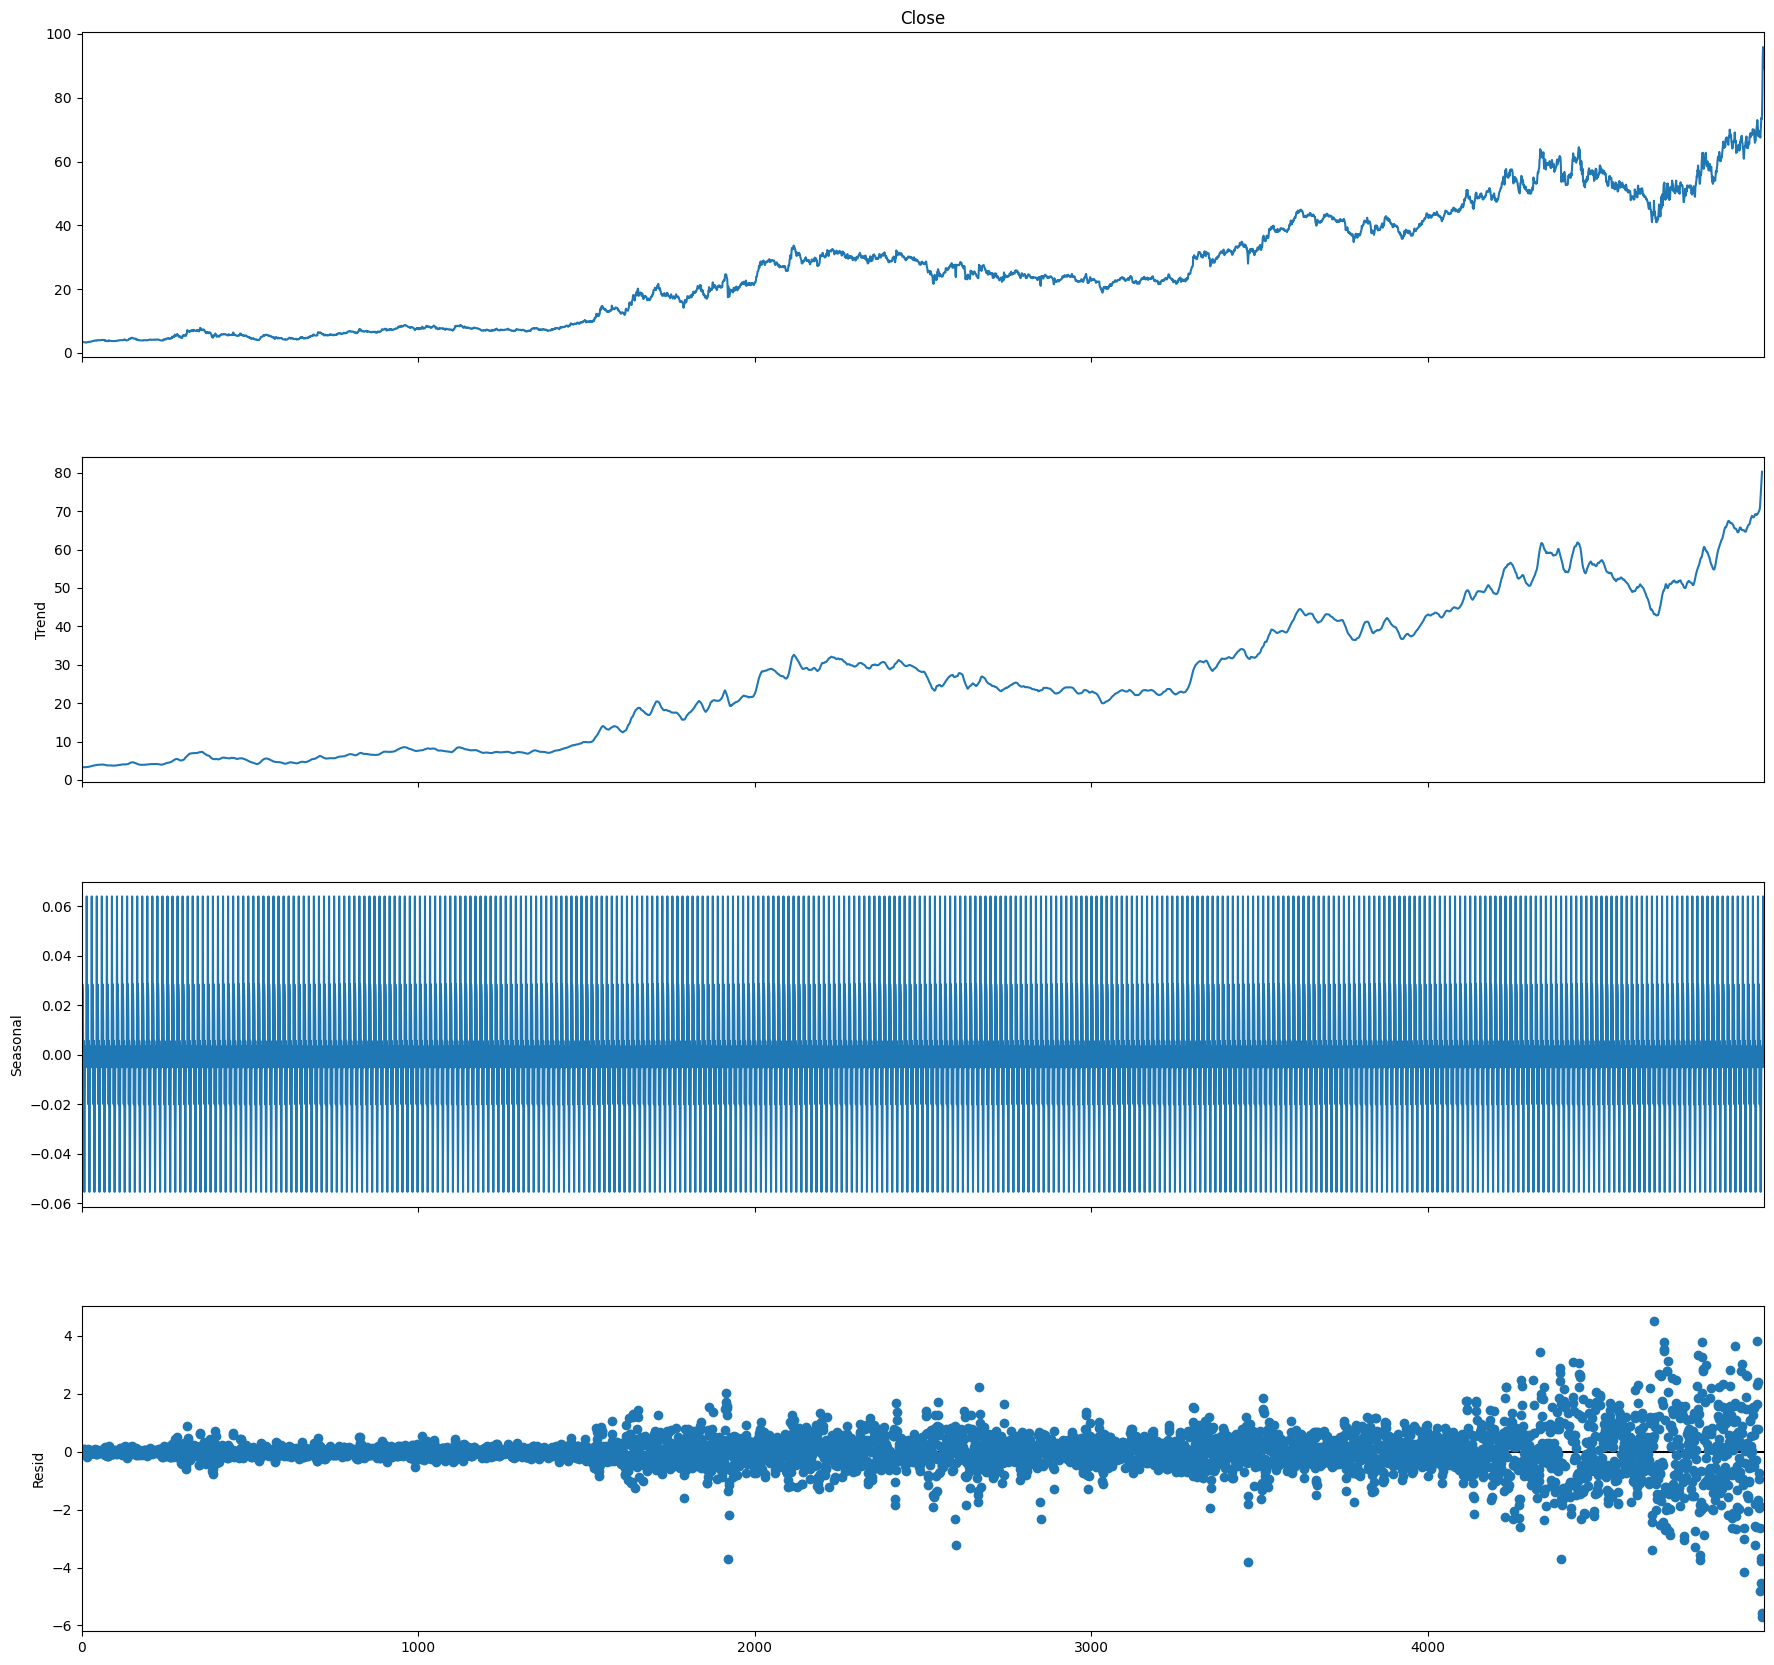

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = df.Close.head(5000)
result = seasonal_decompose(data, model='additive', period = 15)
fig = go.Figure()
fig = result.plot()
fig.set_size_inches(20, 19)

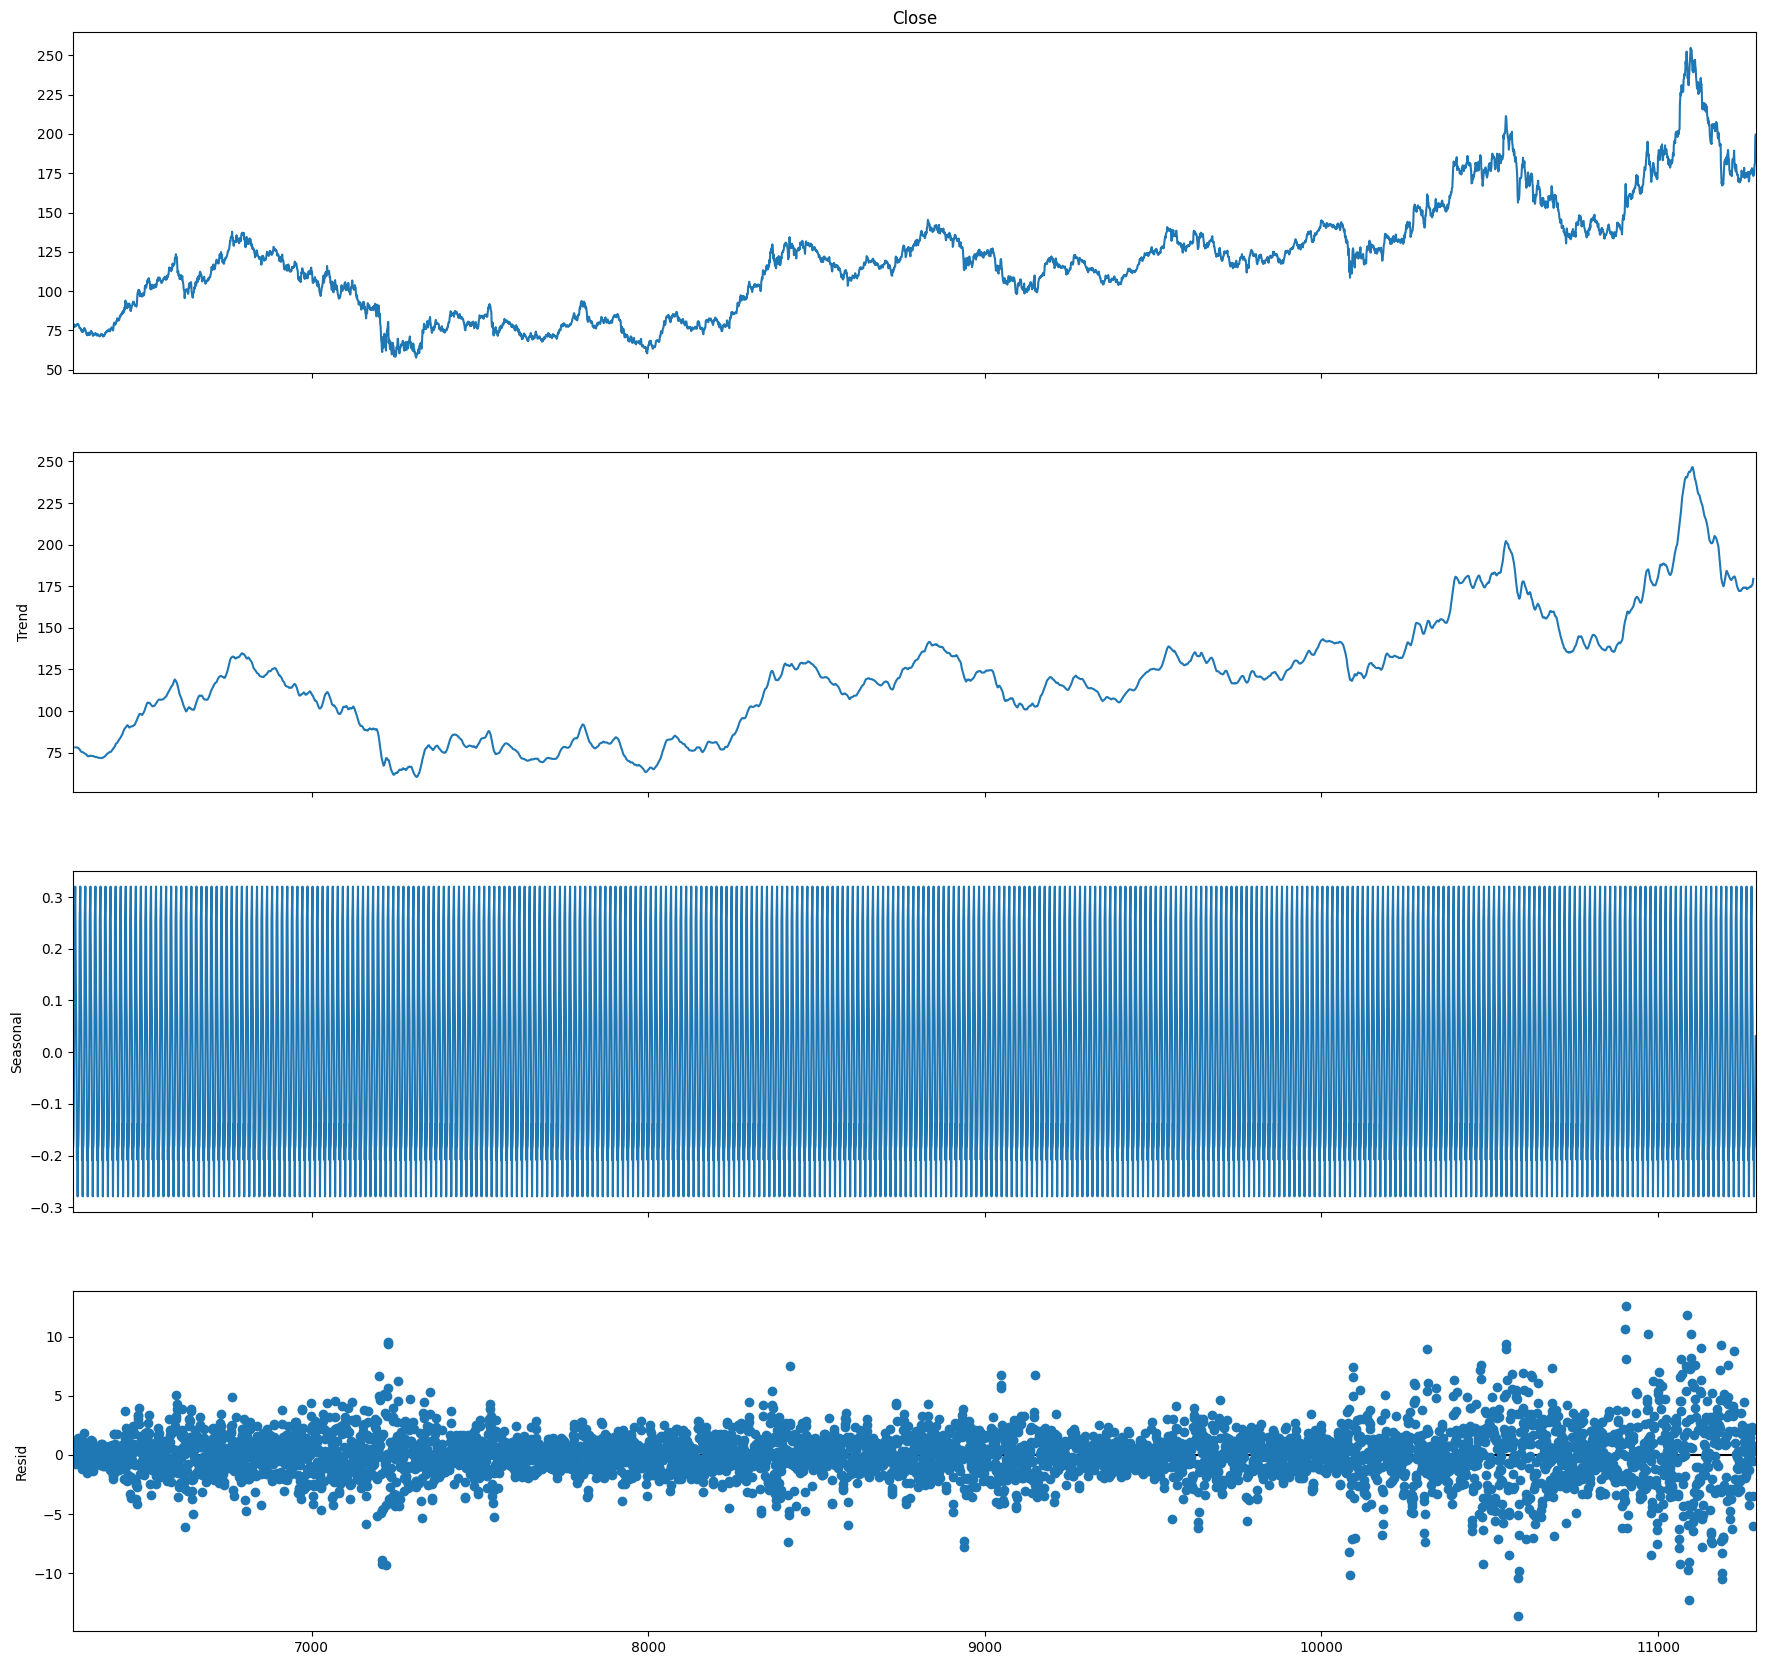

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = df.Close.tail(5000)
result = seasonal_decompose(data, model='additive', period = 15)
fig = go.Figure()
fig = result.plot()
fig.set_size_inches(20, 19)

### Comparison of Random Fluctuations

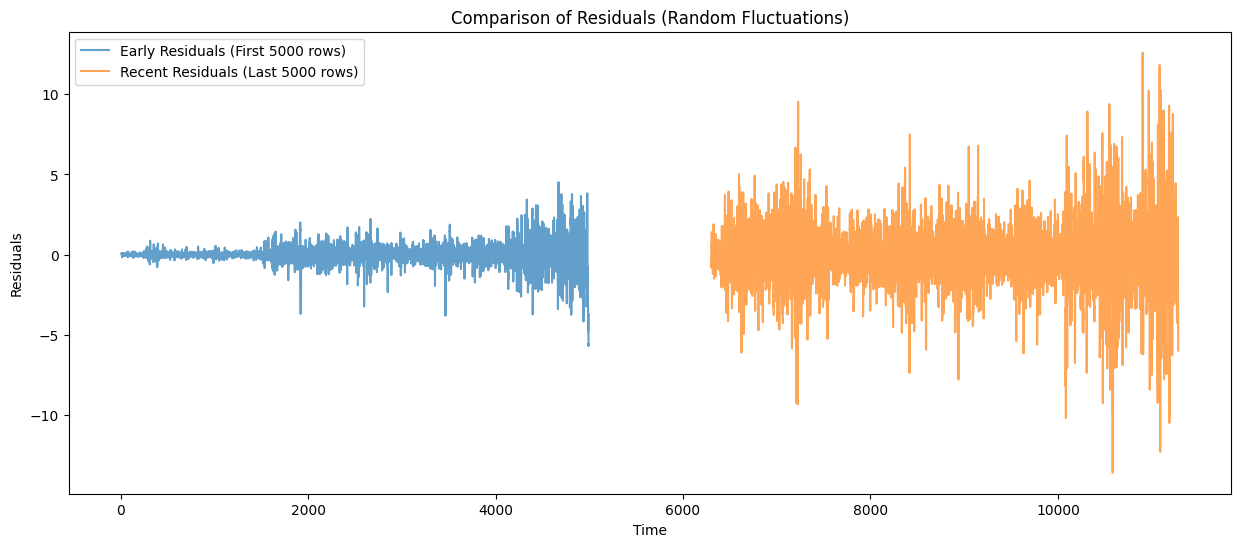

In [19]:
# Early 5000 rows
early_data = df.Close.head(5000)
early_result = seasonal_decompose(early_data, model='additive', period=15)
early_residuals = early_result.resid  # Extract residuals

# Recent 5000 rows
recent_data = df.Close.tail(5000)
recent_result = seasonal_decompose(recent_data, model='additive', period=15)
recent_residuals = recent_result.resid  # Extract residuals

# Plot Residuals
plt.figure(figsize=(15, 6))
plt.plot(early_residuals, label="Early Residuals (First 5000 rows)", alpha=0.7)
plt.plot(recent_residuals, label="Recent Residuals (Last 5000 rows)", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.title("Comparison of Residuals (Random Fluctuations)")
plt.legend()
plt.show()

Recent Trades : higher unpredictability

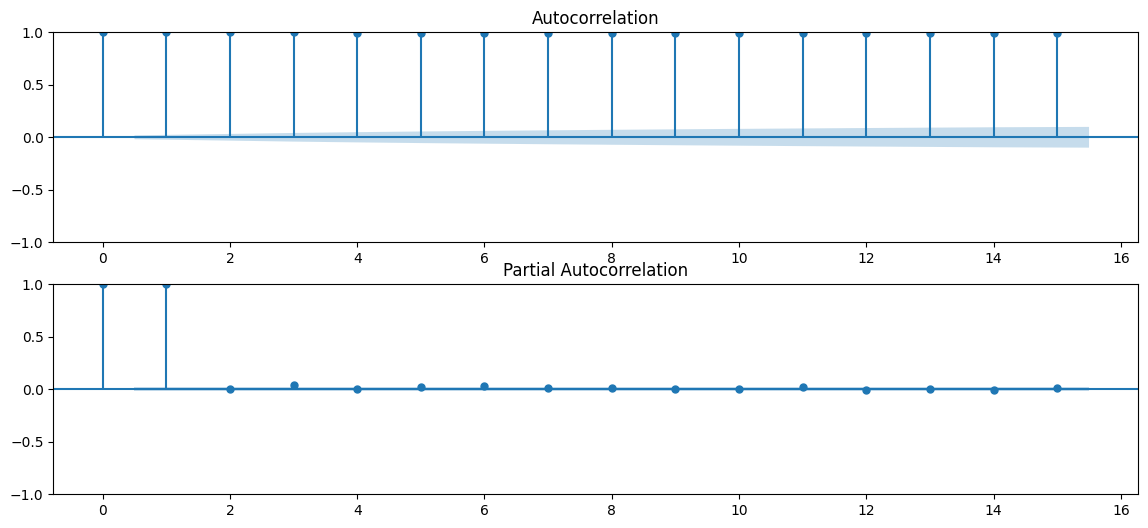

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(14, 6))
plot_acf(df['Close'], ax=ax[0], lags=15)
plot_pacf(df['Close'], ax=ax[1], lags=15)
plt.show()

Autocorrelation Function

Partial Autocorrelation Function :
low-order AR process

### Correlation between features

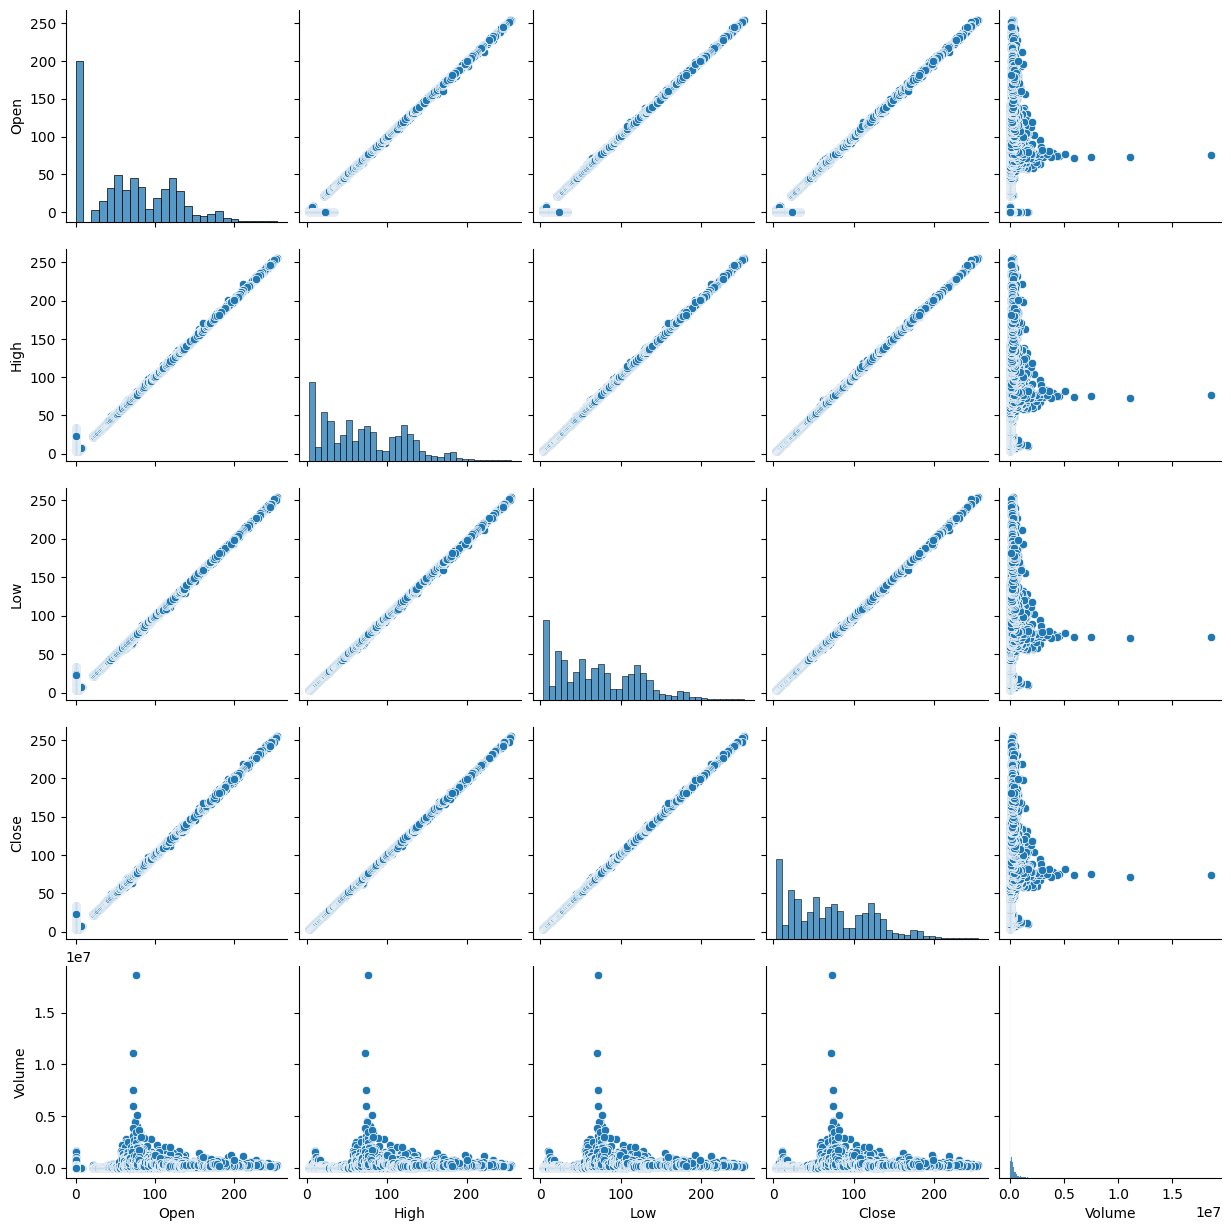

In [39]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

### Checking for Stationary  

ADF test

In [20]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Close'].dropna())

print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

if adf_result[1] < 0.05:
    print("The data is stationary (reject H0).")
else:
    print("The data is non-stationary (fail to reject H0).")


ADF Test Statistic: -0.44290839689492095
p-value: 0.9026843620463811
Critical Values: {'1%': -3.430930577897715, '5%': -2.8617965840703468, '10%': -2.5669065745902966}
The data is non-stationary (fail to reject H0).


In [27]:
import numpy as np

In [28]:
df['Close_log'] = np.log(df['Close'])

In [30]:
adf_result_diff = adfuller(df['Close_log'].dropna())

print("ADF Test Statistic (Differenced Data):", adf_result_diff[0])
print("p-value:", adf_result_diff[1])
print("Critical Values:", adf_result_diff[4])

if adf_result_diff[1] < 0.05:
    print("The differenced data is stationary (reject H0).")
else:
    print("The data is still non-stationary (fail to reject H0).")

ADF Test Statistic (Differenced Data): -2.2729606302886367
p-value: 0.18083703490839792
Critical Values: {'1%': -3.430929600184755, '5%': -2.8617961520161908, '10%': -2.5669063446091704}
The data is still non-stationary (fail to reject H0).


#### Boxcox

In [40]:
from scipy.stats import boxcox

df['Close_shifted'] = df['Close'] + 1
df['Close_boxcox'], lambda_val = boxcox(df['Close_shifted'])

print("Optimal Lambda:",lambda_val)

Optimal Lambda: 0.45008694166139024


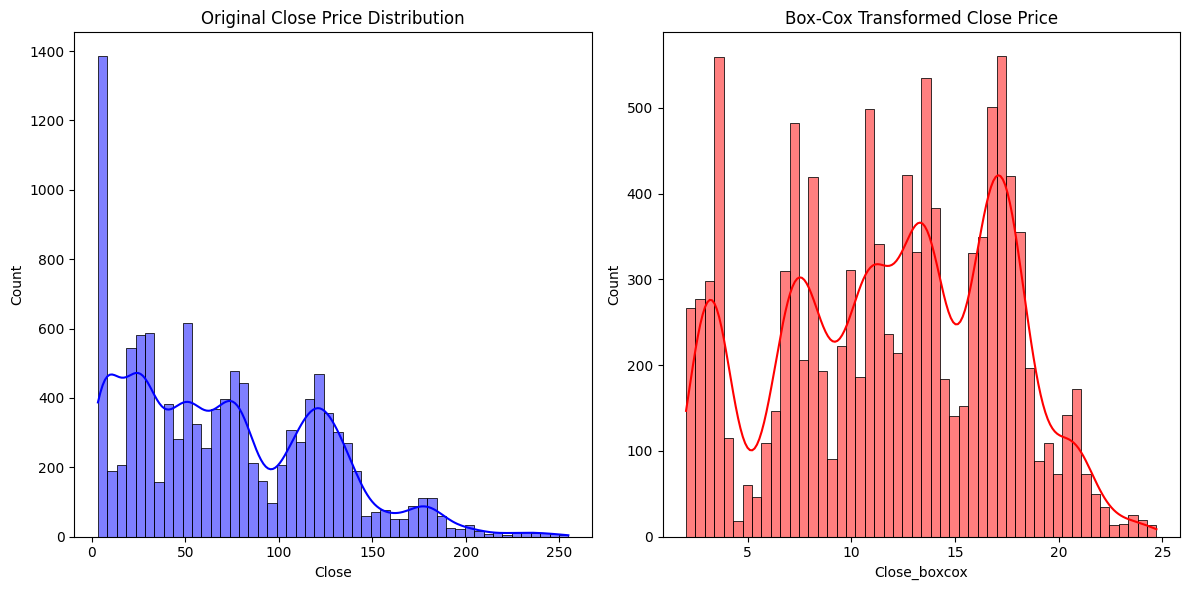

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], kde=True, bins=50, color="blue")
plt.title("Original Close Price Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['Close_boxcox'], kde=True, bins=50, color="red")
plt.title("Box-Cox Transformed Close Price")

plt.tight_layout()
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Close_boxcox'].dropna())

print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("The transformed data is stationary (reject H0).")
else:
    print("The data is still non-stationary (fail to reject H0).")

ADF Test Statistic: -0.9776517037038799
p-value: 0.761327817568214
The data is still non-stationary (fail to reject H0).


In [34]:
df['Close_boxcox_diff'] = df['Close_boxcox'].diff().dropna()

In [35]:
adf_result_diff = adfuller(df['Close_boxcox_diff'].dropna())

print("ADF Test Statistic:", adf_result_diff[0])
print("p-value:", adf_result_diff[1])

if adf_result_diff[1] < 0.05:
    print("The differenced data is stationary (reject H0).")
else:
    print("The data is still non-stationary (fail to reject H0).")


ADF Test Statistic: -36.27217986737069
p-value: 0.0
The differenced data is stationary (reject H0).


### Candlestick Analysis

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

fig.update_layout(title="Stock Price Candlestick Chart", xaxis_rangeslider_visible=False)
fig.show()

In [44]:
last_month_data = df[df['Date'] >= df['Date'].max() - pd.DateOffset(years=25)]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=last_month_data['Date'],
                                     open=last_month_data['Open'],
                                     high=last_month_data['High'],
                                     low=last_month_data['Low'],
                                     close=last_month_data['Close'])])
fig.update_layout(title="Stock Price Candlestick Chart 2000 to recent", xaxis_rangeslider_visible=False)
fig.show()


In [42]:
start_date = '1982-01-01'
end_date = '1995-12-31'

filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

fig = go.Figure(data=[go.Candlestick(x=filtered_df['Date'],
                                     open=filtered_df['Open'],
                                     high=filtered_df['High'],
                                     low=filtered_df['Low'],
                                     close=filtered_df['Close'])])

fig.update_layout(title=f"Stock Price Candlestick Chart 1982-01 to 1995-12)",
                  xaxis_rangeslider_visible=False)
fig.show()